In [1]:
%matplotlib widget
from main import *
import sympy as sp
import matplotlib.pyplot as plt
from sympy import Heaviside, sin, cos
sp.init_printing()

In [2]:
Vcc = 5

Vin = 10 + 6 * sin(t)

In [3]:
stabilisator = Solver.Circuit("stabilisator")
stabilisator.element(
                    VoltageSource("Vg", {"V+" : "Vg", "V-" : Gnd}, V_t = Vin),
                    
                    Resistor("Rz", {"V1" : "Vg", "V2" : "Vz"}, R = 10e3),
                    Diode("Dz", {"Vp" : "Vz", "Vn" : Gnd}, Vd = 5),
                    
                    NPN("Q1", {"Vc" : "Vg", "Vb" : "Vz", "Ve" : "Vout"}),
                    
                    Resistor("Rl", {"V1" : "Vout", "V2" : Gnd}, R = 4.4e3),
                    #CurrentSource("Iout", {"V+" : "Vout", "V-" : Gnd}, I_t = -1e-3),
                    
)

{'Vg': {'name': 'Vg', 'type': 'VoltageSource', 'nodes': {'V+': 'Vg', 'V-': 0}, 'values': {'Vdc': 0, 'Vac': 0, 'V_t': 6*sin(t) + 10}},
 'Rz': {'name': 'Rz', 'type': 'Resistor', 'nodes': {'V1': 'Vg', 'V2': 'Vz'}, 'values': {'R': 10000.0}},
 'Dz': {'name': 'Dz', 'type': 'Diode', 'nodes': {'Vp': 'Vz', 'Vn': 0}, 'values': {'Vd': 5, 'T': 300}},
 'Q1': {'name': 'Q1', 'type': 'NPN', 'nodes': {'Vc': 'Vg', 'Vb': 'Vz', 'Ve': 'Vout'}, 'values': {'Vdf': 0.6, 'Vdr': 0.4, 'Bf': 100, 'Br': 0.1}},
 'Rl': {'name': 'Rl', 'type': 'Resistor', 'nodes': {'V1': 'Vout', 'V2': 0}, 'values': {'R': 4400.0}}}

In [4]:
Solver.setMain("stabilisator")
compiled = Solver.compile()

In [5]:
print(compiled["nodes"])

Vin = compiled["voltages"]["Vg"]["V+"]
Iin = compiled["currents"]["Vg"]["V-"]
Vout = compiled["nodes"]["Vout"]
Iout = compiled["currents"]["Rl"]["V1"]
#Iout = compiled["currents"]["Iout"]["V+"]

print(Vin)
print(Iin)
print(Vout)
print(Iout)

{'Vz': V0, 'Vg': V1, 'Vout': V2}
V1
I0_1
V2
I4_0


In [12]:
model = solveLaplace(compiled, 10, tstep = 0.1, debugLog = 1)

{I2_1, I3_2, V2, I2_0, I3_1, I4_0, V1, I0_0, I0_1, I1_1, I1_0, I3_0, I4_1, V0}
[Eq(I1_1 + I2_0 + I3_1, 0), Eq(I0_0 + I1_0 + I3_0, 0), Eq(I3_2 + I4_0, 0)]
{'Vg': {'name': 'Vg', 'type': 'VoltageSource', 'nodes': {'V+': 'Vg', 'V-': 0}, 'values': {'Vdc': 0, 'Vac': 0, 'V_t': 6*sin(t) + 10}}, 'Rz': {'name': 'Rz', 'type': 'Resistor', 'nodes': {'V1': 'Vg', 'V2': 'Vz'}, 'values': {'R': 10000.0}}, 'Dz': {'name': 'Dz', 'type': 'Diode', 'nodes': {'Vp': 'Vz', 'Vn': 0}, 'values': {'Vd': 5, 'T': 300}}, 'Q1': {'name': 'Q1', 'type': 'NPN', 'nodes': {'Vc': 'Vg', 'Vb': 'Vz', 'Ve': 'Vout'}, 'values': {'Vdf': 0.6, 'Vdr': 0.4, 'Bf': 100, 'Br': 0.1}}, 'Rl': {'name': 'Rl', 'type': 'Resistor', 'nodes': {'V1': 'Vout', 'V2': 0}, 'values': {'R': 4400.0}}}
{'Vg': {'V+': V1, 'V-': 0}, 'Rz': {'V1': V1, 'V2': V0}, 'Dz': {'Vp': V0, 'Vn': 0}, 'Q1': {'Vc': V1, 'Vb': V0, 'Ve': V2}, 'Rl': {'V1': V2, 'V2': 0}}
{'Vg': {'V+': I0_0, 'V-': I0_1}, 'Rz': {'V1': I1_0, 'V2': I1_1}, 'Dz': {'Vp': I2_0, 'Vn': I2_1}, 'Q1': {'Vc': I3_0

100%|██████████| 7/7 [00:40<00:00,  5.77s/it]


4.100000000000001 								
Changed state:  {('Dz', 'Fwd')}
4.0974975585937505 						
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
{('Rl', ''), ('Q1', 'Cut'), ('Dz', 'Cut'), ('Vg', ''), ('Rz', '')}
[Eq(V1, 1.0*(5.09898347674487*s**2 - 3.4612190105193*s + 10.0)/(s*(s**2 + 1))), Eq(I0_0 + I0_1, 0), Eq(I1_0, -0.0001*V0 + 0.0001*V1), Eq(I1_0 + I1_1, 0), Eq(I2_0, 0), Eq(I2_1, 0), Eq(I3_0, 0), Eq(I3_1, 0), Eq(I3_2, 0), Eq(I4_0, 0.000227272727272727*V2), Eq(I4_0 + I4_1, 0), Eq(I1_1 + I2_0 + I3_1, 0), Eq(I0_0 + I1_0 + I3_0, 0), Eq(I3_2 + I4_0, 0)]
{('Dz', 'Cut'): [V0 <= 5], ('Q1', 'Cut'): [V0 - V2 <= 0.6, V0 - V1 <= 0.4]}
{V2, V1, V0}
-------------------------------------------------
{I0_0: 0.0, I0_1: 0.0, I1_0: 0.0, I1_1: 0.0, I2_0: 0.0, I3_0: 0.0, I3_1: 0.0, V0: (509898347674487.0*s**2 - 346121901051930.0*s + 1.0e+15)/(100000000000000.0*s**3 + 100000000000000.0*s), V1: (509898347674487.0*s**2 - 346121901051930.0*s + 1.0e+15)/(100000000000000.0*s**3 + 100000000000000.0*s), I2_1: 0.0, I3_2: 

100%|██████████| 12/12 [01:15<00:00,  6.26s/it]


5.397497558593746 							
Changed state:  {('Dz', 'Cut')}
5.327307128906247 						
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
{('Rl', ''), ('Q1', 'Cut'), ('Vg', ''), ('Dz', 'Fwd'), ('Rz', '')}
[Eq(V1, 1.0*(5.09907598556341*s**2 + 3.46134999743145*s + 10.0)/(s*(s**2 + 1))), Eq(I0_0 + I0_1, 0), Eq(I1_0, -0.0001*V0 + 0.0001*V1), Eq(I1_0 + I1_1, 0), Eq(V0, 5/s), Eq(I2_0 + I2_1, 0), Eq(I3_0, 0), Eq(I3_1, 0), Eq(I3_2, 0), Eq(I4_0, 0.000227272727272727*V2), Eq(I4_0 + I4_1, 0), Eq(I1_1 + I2_0 + I3_1, 0), Eq(I0_0 + I1_0 + I3_0, 0), Eq(I3_2 + I4_0, 0)]
{('Dz', 'Fwd'): [I2_0 > 0], ('Q1', 'Cut'): [V0 - V2 <= 0.6, V0 - V1 <= 0.4]}
{V2, I2_0, V1, V0}
-------------------------------------------------
{I0_0: (-9907598556341.0*s**2 - 346134999743145.0*s - 500000000000000.0)/(1.0e+18*s**3 + 1.0e+18*s), I0_1: (9907598556341.0*s**2 + 346134999743145.0*s + 500000000000000.0)/(1.0e+18*s**3 + 1.0e+18*s), I1_0: (9907598556341.0*s**2 + 346134999743145.0*s + 500000000000000.0)/(1.0e+18*s**3 + 1.0e+18*s), I

100%|██████████| 7/7 [00:38<00:00,  5.50s/it]


10.02730712890623 							
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


In [13]:
Pd = (Vin - Vout) * Iout + Vin * (Iin - Iout)

In [14]:
printModel(model, var=t, measurments=[Pd])

{('Rl', ''), ('Vg', ''), ('Q1', 'Fwd'), ('Dz', 'Fwd'), ('Rz', '')}
t ∈ Interval.Ropen(0, 4.09749755859375)
I4_0*(V1 - V2) + V1*(I0_1 - I4_0)  : 
          2                                                    
0.0036⋅sin (t) + 0.0149405940594059⋅sin(t) + 0.0105009900990099
-------------------------------------
{('Rl', ''), ('Dz', 'Cut'), ('Vg', ''), ('Q1', 'Fwd'), ('Rz', '')}
t ∈ Interval.Ropen(4.09749755859375, 5.32730712890625)
I4_0*(V1 - V2) + V1*(I0_1 - I4_0)  : 
(0.000769329049433206⋅sin(t) + 0.00108935446489605⋅cos(t) - 0.0020893485915492
9)⋅(0.076171193013189⋅sin(t) + 0.10785687771248⋅cos(t) - 0.806866197183099)
-------------------------------------
{('Rl', ''), ('Vg', ''), ('Q1', 'Fwd'), ('Dz', 'Fwd'), ('Rz', '')}
t ∈ Interval(5.32730712890625, 10.0273071289062)
I4_0*(V1 - V2) + V1*(I0_1 - I4_0)  : 
0.00861910420152485⋅sin(t) - 0.00169638133247818⋅sin(2⋅t) - 0.0122037860359485
⋅cos(t) + 0.00060190561952813⋅cos(2⋅t) + 0.0123009900990099
-------------------------------------


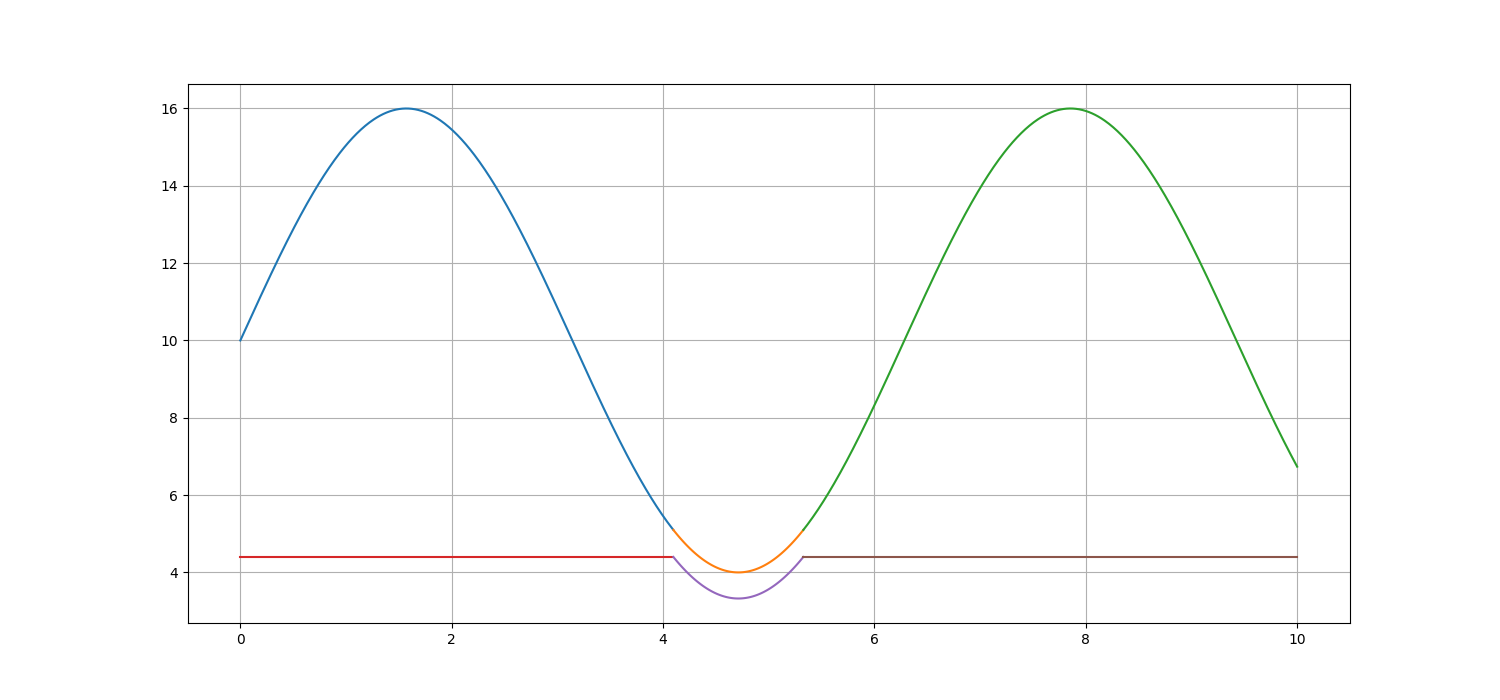

In [15]:
measurments =   [   
                    (t0, Vin, "Vout(Iout)"),
                    (t0, Vout, "Vout(Iout)"),
                ]

fig, ax = plt.subplots(figsize=[15, 7])

plotTranMeasurments(model, 0, 10, 0.01, measurments, ax)
#plotMeasurments(model, -10, 10, 0.1, measurments)
#plt.legend(loc="best");
plt.grid(True);
plt.show()

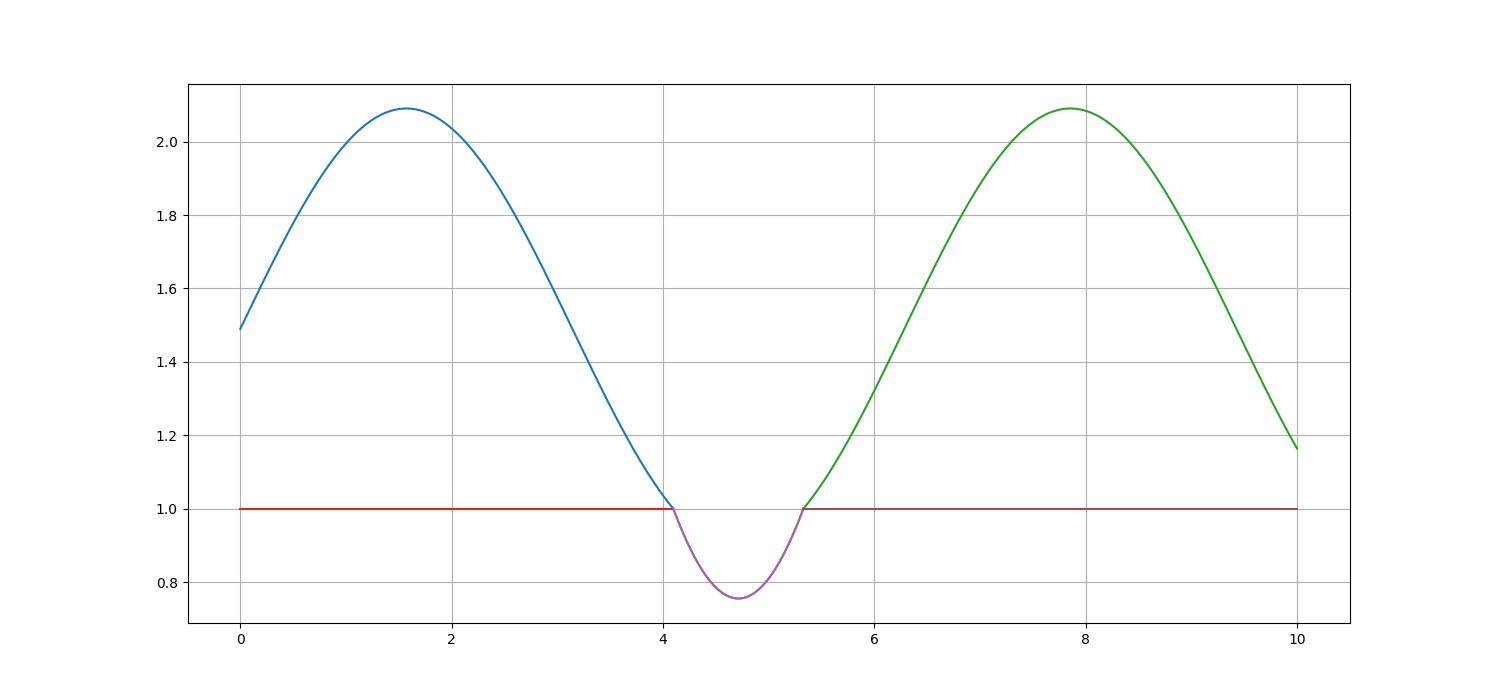

In [16]:
measurments =   [   
                    (t0, 1e3 * Iin, "Iin(t)"),
                    (t0, 1e3 * Iout, "Iout(t)"),
                ]

fig, ax = plt.subplots(figsize=[15, 7])

plotTranMeasurments(model, 0, 10, 0.01, measurments, ax)
#plotMeasurments(model, -10, 10, 0.1, measurments)
#plt.legend(loc="best");
plt.grid(True);
plt.show()